In [272]:
import pandas as pd
import pickle
import numpy as np

In [273]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def create_similarity():
    data = pd.read_csv('problem-detaset.csv')
    cv = CountVectorizer()
    data['tags'] = data['tags'].astype('string')
    count_matrix = cv.fit_transform(data['tags']).toarray()
    similarity = cosine_similarity(count_matrix)
    return data,similarity

In [274]:
def recommended(tag,id,with_url=None,lenght=10):
    tag = tag.lower()
    data, similarity = create_similarity()
    # print(data.dtypes)
    if tag not in data['tags'].unique():
        return('Tag not found')
    else:
        try:
            i = data[(data['tags']==tag)].index[0]
            lst = list(enumerate(similarity[i]))
            lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
            l = []
            for i in range((lenght)+1):
                a = lst[i][0]
                temp =[]
                if data['id'][a]==id:
                    lenght+=1
                    continue
                if with_url is None:
                    temp.append(data['tags'][a])
                    temp.append(data['id'][a])
                else:
                    temp.append(data['tags'][a])
                    url = 'http://arena.siesgst.ac.in/contest/'+str(data['contestCode'][a])+'/problem/'+str(data['code'][a])
                    temp.append(url)
                l.append(temp)
            return l
        except Exception as e:
            print(e)
            return('No data found')

In [275]:
r = recommended('cakewalk','5c39f0543646190022847c61',with_url=True)
print(r)
print("\n\n")
r = recommended('cakewalk','5c39ed573646190022847c59')
print((r),len(r))
print("\n\n")
r = recommended('cakewalk','5c39ed573646190022847c59',lenght=6)
print((r),len(r))


[['cakewalk', 'http://arena.siesgst.ac.in/contest/UNIVERSE/problem/UNI02'], ['cakewalk', 'http://arena.siesgst.ac.in/contest/UNIVERSE/problem/UNI04'], ['cakewalk', 'http://arena.siesgst.ac.in/contest/SRM22/problem/SRM22A'], ['cakewalk math', 'http://arena.siesgst.ac.in/contest/SRM10/problem/SRM10A'], ['adhoc cakewalk', 'http://arena.siesgst.ac.in/contest/SRM12/problem/SRM12A'], ['math', 'http://arena.siesgst.ac.in/contest/UNIVERSE/problem/UNI01'], ['math', 'http://arena.siesgst.ac.in/contest/UNIVERSE/problem/UNI05'], ['math strings', 'http://arena.siesgst.ac.in/contest/UNIVERSE/problem/UNI06'], ['adhoc strings', 'http://arena.siesgst.ac.in/contest/AUG18/problem/AUG18A'], ['adhoc math', 'http://arena.siesgst.ac.in/contest/AUG18/problem/AUG18B']]



[['cakewalk', '5c39eca03646190022847c54'], ['cakewalk', '5c39f0543646190022847c61'], ['cakewalk', '60fa79a49e8f310022c7d341'], ['cakewalk math', '5d46f3ce86031f00223f4ce7'], ['adhoc cakewalk', '5d7a599fb112e300220a44d0'], ['math', '5b5c8cd727

In [276]:
def prevoius_solve_tag(username):
    pass

In [277]:
data = pd.read_csv('problem-detaset.csv')
data[data['id']=='6065e97c45a5d100227e07bd']
# data.dtypes

,id,name,code,points,contestCode,tags
131,6065e97c45a5d100227e07bd,Eren Vs Jean,APR21F,300,APR21,game theory math geometry


In [278]:
data['tags'] = data['tags'].astype('string')
data.dtypes

id             object
name           object
code           object
points          int64
contestCode    object
tags           string
dtype: object

## Evaluating

In [279]:
from sklearn.model_selection import train_test_split
y=pd.DataFrame({'tags':data['tags']
,   'id':data['id']
})
x=data.drop(['tags','id'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
y_test

,tags,id
135,math,60fa6ca19e8f310022c7d33f
115,adhoc implementation,602f525deb158c002271b469
131,game theory math geometry,6065e97c45a5d100227e07bd
55,adhoc strings,5d46f62486031f00223f4ce8
95,adhoc,5f828e1a253e190022125d37
29,adhoc strings,5c2cd2eee3e5da002279017e
157,adhoc dp,61d95ad22d678f002403d02c
51,strings,5d3c81e87cb1120022007f2f
101,adhoc,5fb0bdc8b5538800223c1c96
145,adhoc strings,614c65eba5479f002378776e


In [280]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
my_dict = dict()
for i in range(len(y_test)):
    my_dict[y_test.iloc[i]['tags']] =y_test.iloc[i]['id']

y_act_test = pd.DataFrame(my_dict.items(), columns=['tags', 'id'])
print(y_act_test)
y_pred = pd.DataFrame(columns=["tags"])
for i in range(len(y_act_test)):
    y_pred.loc[i] = recommended(y_act_test.iloc[i][0],y_act_test.iloc[i][1],lenght=1)[0][0]
y_pred = y_pred['tags'].astype('string')
y_act_test = y_act_test['tags'].astype('string')


                         tags                        id
0                        math  5e15efea73aedb0022810711
1        adhoc implementation  602f525deb158c002271b469
2   game theory math geometry  6065e97c45a5d100227e07bd
3               adhoc strings  614c65eba5479f002378776e
4                       adhoc  5fb0bdc8b5538800223c1c96
5                    adhoc dp  61d95ad22d678f002403d02c
6                     strings  5d3c81e87cb1120022007f2f
7                  adhoc math  5c2dadc092a9930022a9dc85
8              greedy sorting  5f3523bc72b45b0022f74c55
9            sortings strings  5bae7910fda1fc0021bbf24b
10                     graphs  6065da6245a5d100227e07a7


In [281]:
cm = confusion_matrix(y_act_test,y_pred,labels = y_act_test.values)
for i in range(len(y_act_test)):
    if y_act_test.iloc[i] !=y_pred.iloc[i]:
        print(y_act_test.iloc[i],y_pred.iloc[i],len(y_act_test.iloc[i]),len(y_pred.iloc[i]))

game theory math geometry math number theory 25 18
greedy sorting sorting greedy 14 14
sortings strings strings 16 7


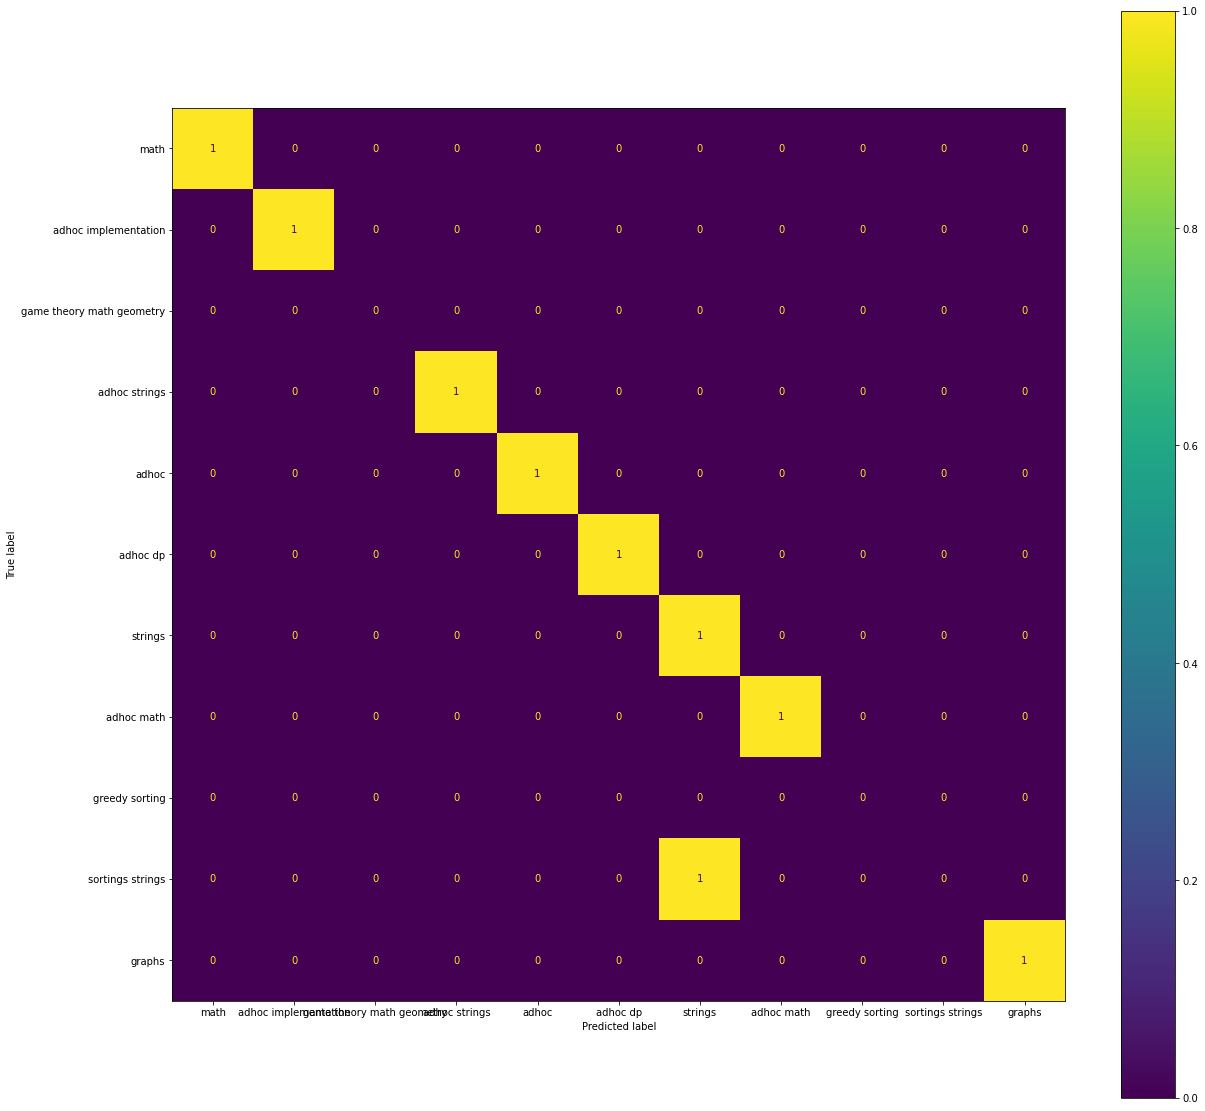

In [282]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=y_act_test.values)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)
plt.show()